# **1- Results Visualization (Tobii Studio)**

# **2- Interpersonal Consistency in Reading Times**

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
import numpy as np


# Load CSV file into a pandas DataFrame
df = pd.read_csv('/content/mode.csv')


# List of features for which we want to plot boxplots and calculate statistics
features = [
    'Time_to_First_Fixation',
    'First_Fixation_Duration',
    'Single_Fixation_Duration',
    'Total_Fixation_Duration',
    'Total_Saccade_Duration',
    'Single_Visit_Duration',
    'Total_Visit_Duration',

]

# **Histograms**

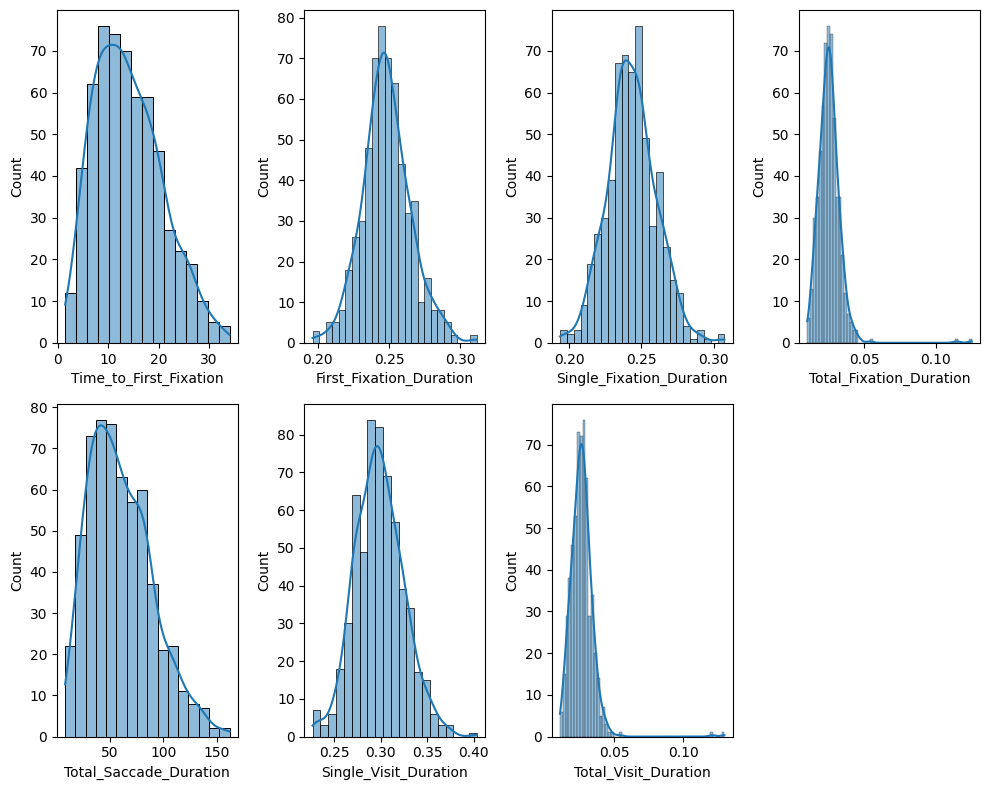

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

for i in list(enumerate(df[features].iloc[:, 0:8].columns)):
    plt.subplot(2, 4, i[0]+1)
    sns.histplot(data = df[features].iloc[:, 0:8][i[1]], kde=True)  # Histogram with KDE line

plt.tight_layout()  # Adjust the layout so plots don't overlap
plt.show()


In [ ]:
from scipy.stats import skew

def classify_skewness(data):
    skewness = skew(data)
    if skewness > 1:
        return 'right-skewed'
    elif skewness < -1:
        return 'left-skewed'
    else:
        return 'roughly normal'

for column in features:
    skewness = classify_skewness(df[column])  # Pass the data of the column
    print(f"Column {column} is {skewness}.")

Column Time_to_First_Fixation is roughly normal.
Column First_Fixation_Duration is roughly normal.
Column Single_Fixation_Duration is roughly normal.
Column Total_Fixation_Duration is right-skewed.
Column Total_Saccade_Duration is roughly normal.
Column Single_Visit_Duration is roughly normal.
Column Total_Visit_Duration is right-skewed.


In [ ]:
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import numpy as np

# Sample data (replace with your own dataframe loading code)
# df = pd.read_csv("your_data.csv")

features = [
    'Time_to_First_Fixation',
    'First_Fixation_Duration',
    'Single_Fixation_Duration',
    'Total_Fixation_Duration',
    'Total_Saccade_Duration',
    'Single_Visit_Duration',
    'Total_Visit_Duration',
]


def pearson_skewness(column):
    n = len(column)
    mean = column.mean()
    std_dev = column.std(ddof=0)  # Ensure population standard deviation is used
    skewness = (n / ((n - 1) * (n - 2))) * sum(((column - mean) / std_dev) ** 3)
    return skewness

# Create empty dataframe with the desired structure
results_df = pd.DataFrame(index=features, columns=['L', 'G'])

# Populate the dataframe
for feature in features:
    # Ensure handling of NaN values in the column, for example, by dropping them
    column_data = df[feature].dropna()

    l_stat, l_p_value = lilliefors(column_data, dist='norm')
    g_skewness = pearson_skewness(column_data)

    results_df.at[feature, 'L'] = l_stat
    results_df.at[feature, 'G'] = g_skewness

print(results_df)
results_df.to_csv('results_df.csv')

                                 L         G
Time_to_First_Fixation    0.055267  0.512163
First_Fixation_Duration   0.043801  0.247957
Single_Fixation_Duration  0.037095  0.189784
Total_Fixation_Duration   0.095816  4.795639
Total_Saccade_Duration    0.068888  0.676176
Single_Visit_Duration     0.029619  0.231388
Total_Visit_Duration      0.100963  4.881446


# **Show Descriptive Stat of the Selected Reading Durations Features**


In [ ]:
!pip install pandas openpyxl

In [ ]:
grouped = df.groupby('Readability_Level')

# Calculate statistics for each column
output = pd.DataFrame()
for col in features:
    output[col, 'mean'] = grouped[col].mean()
    output[col, 'median'] = grouped[col].median()
    output[col, 'std_dev'] = grouped[col].std()
    output[col, 'range'] = grouped[col].max() - grouped[col].min()

print(output)

# Optionally, you can save this to a CSV file
output.to_csv('ReadingDurationsStatistics.csv')

                   (Time_to_First_Fixation, mean)  \
Readability_Level                                   
1                                       13.844220   
2                                       13.735757   
3                                       15.445083   

                   (Time_to_First_Fixation, median)  \
Readability_Level                                     
1                                         13.126913   
2                                         12.413643   
3                                         14.781549   

                   (Time_to_First_Fixation, std_dev)  \
Readability_Level                                      
1                                           6.443096   
2                                           7.181834   
3                                           5.851705   

                   (Time_to_First_Fixation, range)  \
Readability_Level                                    
1                                        31.101232   
2              

In [ ]:
!pip install pandas openpyxl

# **3- Association Between Readability Levels, Reading Durations, and OSMAN Scores**

In [ ]:
# Show Summary of Reading Times

# Filter the data for the specified readability levels
filtered_data = df[df['Readability_Level'].isin([1,2,3])]


# Group by 'Readability_Level' and calculate the mean of specified features
result = filtered_data.groupby('Readability_Level')[[
    'Time_to_First_Fixation',
    'First_Fixation_Duration',
    'Single_Fixation_Duration',
    'Total_Fixation_Duration',
    'Total_Saccade_Duration',
    'Single_Visit_Duration',
    'Total_Visit_Duration',
 'OSMAN_Score']].mean()


# Display the result
print(result)

df2 = pd.DataFrame(result)

# Save the dataframe to an Excel file
df2.to_excel('Paragraphs_ReadingTimes.xlsx', index=False)


df2


                   Time_to_First_Fixation  First_Fixation_Duration  \
Readability_Level                                                    
1                               13.844220                 0.247190   
2                               13.735757                 0.249818   
3                               15.445083                 0.252229   

                   Single_Fixation_Duration  Total_Fixation_Duration  \
Readability_Level                                                      
1                                  0.242298                 0.024638   
2                                  0.245161                 0.027500   
3                                  0.246480                 0.029687   

                   Total_Saccade_Duration  Single_Visit_Duration  \
Readability_Level                                                  
1                               59.600699               0.297597   
2                               59.180923               0.300606   
3               

,Time_to_First_Fixation,First_Fixation_Duration,Single_Fixation_Duration,Total_Fixation_Duration,Total_Saccade_Duration,Single_Visit_Duration,Total_Visit_Duration,OSMAN_Score
Readability_Level,,,,,,,,
1,13.844220,0.247190,0.242298,0.024638,59.600699,0.297597,0.025422,128.443551
2,13.735757,0.249818,0.245161,0.027500,59.180923,0.300606,0.028312,130.110741
3,15.445083,0.252229,0.246480,0.029687,65.240948,0.300320,0.030532,127.511970
